### SW Exercise 4
### Bus Adm 745 - Madeline Henry

# The CIFAR-10 dataset
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

Here are the classes in the dataset, as well as 10 random images from each:
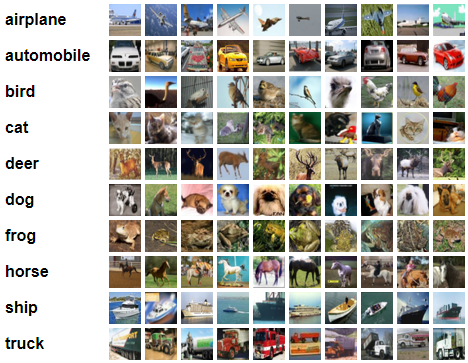
The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks

https://www.cs.toronto.edu/~kriz/cifar.html

#### Assignment prompts: [1] Build a convolutional neural network (CNN) on the CIFAR10 dataset using TensorFlow. The CNN should be able to predict the class the image belongs to (airplane, automobile, bird, etc.). 

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


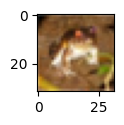

In [1]:
# TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras  # API for TensorFlow
import numpy as np
import matplotlib.pyplot as plt
import pandas as pda


# load dataset
from keras.datasets import cifar10

# Split into testing and training data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

plt.figure(figsize=(10,1))
plt.imshow(x_train[0])

In [2]:
# Normalize dataset to 01 to 1 range by dividing each pixel value by 255.0
# Pixel values for each channel (RGB) can range from 0 to 256 for each RGB. Each number represents a color code. 

# Set data type and normalize features
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

# Reshape target
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
y_train_names = y_train
y_test_names = y_test

#Set data type for categorical labels
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [3]:
model = keras.Sequential([
    
    # cnn layers
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32, 32 ,3)),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    
    # dense layers
    keras.layers.Flatten(), 
    keras.layers.Dense(64, activation='relu'),  
    keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

In [4]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [5]:
model.fit(x_train, y_train, batch_size=64, epochs=40)

train_loss, train_acc = model.evaluate(x_train, y_train)
test_loss, test_acc = model.evaluate(x_test, y_test)

print("Train Loss: ", train_loss)
print("Train Acc: ", train_acc)
print("Tested Loss: ", test_loss)
print("Tested Acc: ", test_acc)

Epoch 1/40
782/782 [==============================] - 6s 3ms/step - loss: 1.5778 - accuracy: 0.4201
Epoch 2/40
782/782 [==============================] - 2s 3ms/step - loss: 1.2101 - accuracy: 0.5713
Epoch 3/40
782/782 [==============================] - 2s 3ms/step - loss: 1.0500 - accuracy: 0.6336
Epoch 4/40
782/782 [==============================] - 2s 3ms/step - loss: 0.9471 - accuracy: 0.6734
Epoch 5/40
782/782 [==============================] - 2s 3ms/step - loss: 0.8618 - accuracy: 0.7019
Epoch 6/40
782/782 [==============================] - 2s 3ms/step - loss: 0.7978 - accuracy: 0.7246
Epoch 7/40
782/782 [==============================] - 2s 3ms/step - loss: 0.7411 - accuracy: 0.7446
Epoch 8/40
782/782 [==============================] - 2s 3ms/step - loss: 0.6959 - accuracy: 0.7582
Epoch 9/40
782/782 [==============================] - 2s 3ms/step - loss: 0.6558 - accuracy: 0.7723
Epoch 10/40
782/782 [==============================] - 2s 3ms/step - loss: 0.6208 - accuracy: 0.7841

#### [2] Compare the performance results of the CNN model from Q1 with the results you achieved by using a deep neural network in SW Exercise 3. Comment on any improvements in performance.

In [6]:
# Results from deep neural network in Ex3:
# Train Loss:  1.335436463356018
# Train Acc:  0.5250800251960754
# Tested Loss:  1.546170949935913
# Tested Acc:  0.4595000147819519

After 20 epochs, the accuracy value of the CNN was approximately 96% on the training set and 70% on the test set, whereas the accuracy of the deep neural network from the last exercise was approximately 53% on the training set and 46% on the test set. The CNN model is a marked improvement over the performance accuracy of the deep neural network, particularly on the training data. Overall, this model performs well, although, I do think that improvement would still be needed to apply this model in a real-life use case.

#### [3] Print the confusion matrix for the CNN on the test set. Comment on the performance of the model based on this matrix. Specifically discuss where the maximum confusion between images is coming from.

In [7]:
y_pred = model.predict(x_test)

y_pred_classes = [np.argmax(element) for element in y_pred]
y_test_classes = [np.argmax(element) for element in y_test]
#y_pred_classes = [class_names[element]for element in y_pred_classes]
#y_test_classes = [class_names[element]for element in y_test_classes]


#print(y_pred_classes[:5])
#print(y_test_classes[:5])

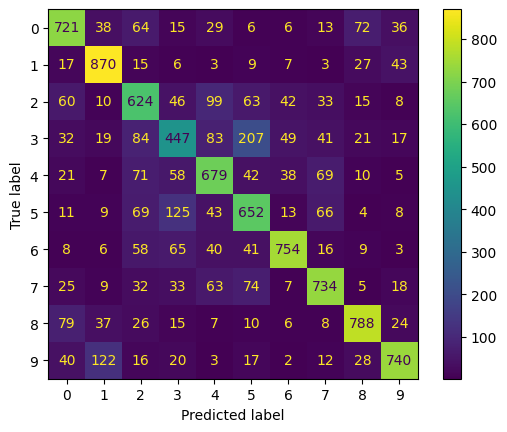

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

The confusion matrix does show consistency with the accuracy metrics as far as the majority of predictions being correctly labeled by the model. The highest value for correctly predicted classification labels was in the index 1 or automobile image calssification. The most common misidentification was in labeling index 3 as index 5, or labeling a cat as a dog. 

#### [4] Select any three images from the test set and apply the trained CNN to predict the classes they belong to.

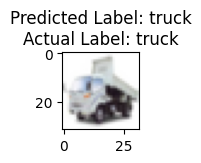

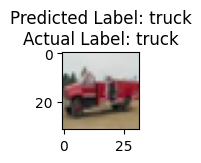

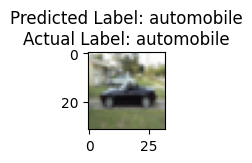

In [9]:
from random import *

def plot_pred(X, y, index):
    plt.figure(figsize = (10,1))
    plt.imshow(x_test[index])
    plt.title(f'Predicted Label: {class_names[y_pred_classes[index]]}\nActual Label: {class_names[y_test_names[index]]}')

plot_pred(x_test, y_test, randint(1, 1000))
plot_pred(x_test, y_test, randint(1, 1000))
plot_pred(x_test, y_test, randint(1, 1000))